In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demographic Analysis

In [4]:
df=pd.read_csv('accident.csv')

In [9]:
df.shape

(200, 6)

In [5]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [7]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

#Average age

In [13]:
x=df['Age'].mean()
print(x)

43.425


In [15]:
df['Gender'].value_counts(normalize=True)*100

Gender
Female    55.276382
Male      44.723618
Name: proportion, dtype: float64

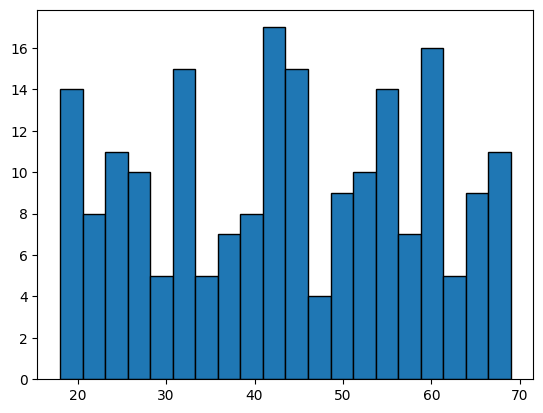

In [ ]:
plt.hist(df['Age'],bins=20 ,edgecolor='black')
plt.show()
##early to mid 40s

## impact of safety measures

In [26]:
from sklearn.preprocessing import LabelEncoder

helmetusage = LabelEncoder().fit_transform(df['Helmet_Used'])
seatbelts=LabelEncoder().fit_transform(df['Seatbelt_Used'])
c=np.corrcoef(helmetusage,seatbelts)

print(c)


[[1.         0.08897662]
 [0.08897662 1.        ]]


In [34]:
count= df['Seatbelt_Used'].value_counts().get('Yes',0)/200
print(count)


0.555


In [42]:
survSeat = LabelEncoder().fit_transform(df['Seatbelt_Used'])
print(np.corrcoef(survSeat,df['Survived']))

pivot = df.pivot_table( columns='Survived', aggfunc=len, fill_value=0)
print(pivot)

[[1.         0.05926257]
 [0.05926257 1.        ]]
Survived          0    1
Age              99  101
Gender           99  101
Helmet_Used      99  101
Seatbelt_Used    99  101
Speed_of_Impact  99  101


In [ ]:
aggregated_data = df[df['Survived'] == 1].groupby(['Seatbelt_Used', 'Helmet_Used']).agg(
    survivors=('Survived', 'count'),
   
)

#32 wore both and survived
print(aggregated_data)


                           survivors
Seatbelt_Used Helmet_Used           
No            No                  20
              Yes                 22
Yes           No                  27
              Yes                 32 None


## speed and severity

In [67]:
print(df[df['Speed_of_Impact']==df['Speed_of_Impact'].max()])

     Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
174   24  Female            119.0         Yes           Yes         0
180   62  Female            119.0         Yes           Yes         1


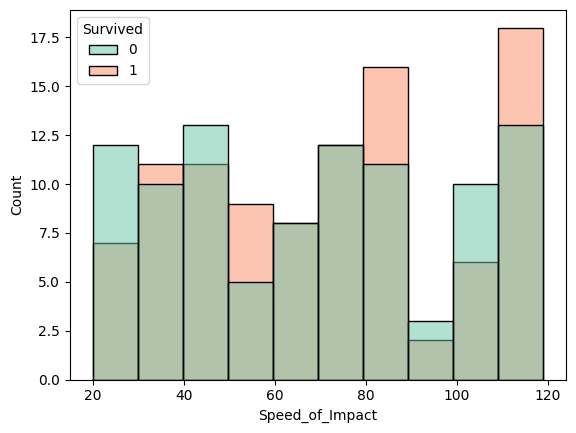

,Speed_of_Impact,Survived
Speed_of_Impact,1.00000,0.04252
Survived,0.04252,1.00000


In [ ]:
sns.histplot(x='Speed_of_Impact', hue='Survived', data=df, palette = "Set2",binwidth=10)
plt.show()
df[['Speed_of_Impact','Survived']].corr()
#there doesnt seem to be a particular threshold

## comparative Insights

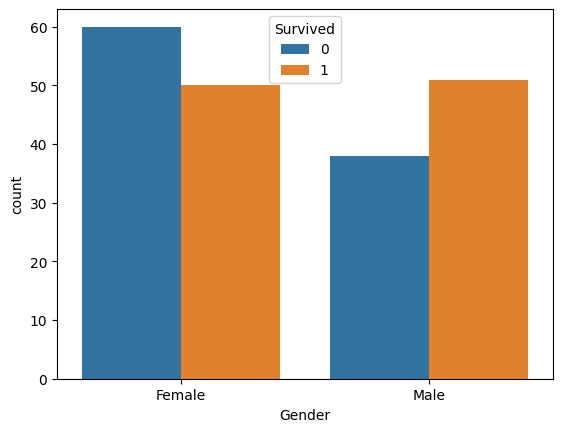

In [ ]:

sns.countplot(x='Gender',hue='Survived',data=df)
plt.show()

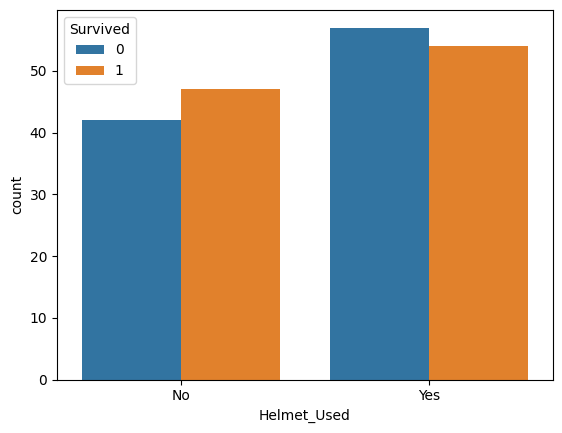

In [81]:
sns.countplot(x='Helmet_Used',hue='Survived',data=df)
plt.show()

            survivors
Gender Age           
Female 18           1
       19           2
       24           1
       25           1
       26           1
...               ...
Male   58           1
       60           1
       61           3
       64           2
       68           2

[64 rows x 1 columns]


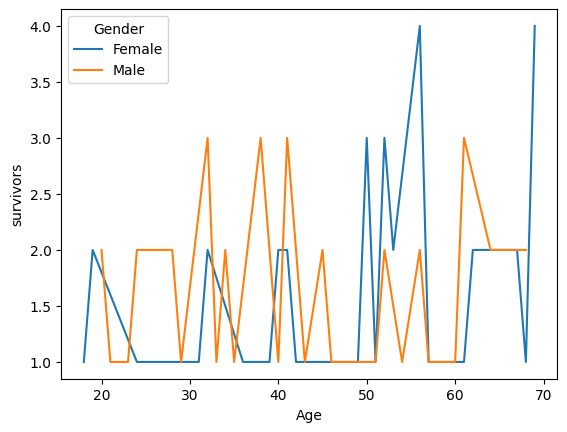

In [ ]:
aggregated_data = df[df['Survived'] == 1].groupby(['Gender','Age']).agg(
    survivors=('Survived', 'count'),
)
sns.lineplot(data=aggregated_data, x='Age', y='survivors', hue='Gender')
print(aggregated_data)
plt.show()

#there are more older men survivors than women